In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import fisher_exact
from sklearn.preprocessing import OneHotEncoder




In [2]:
df = pd.read_csv("dados\\train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [4]:
df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
colunas_originais = df.columns.tolist()

colunas_traduzidas = ['id', 'idade', 'renda_anual', 'status_moradia_atual',
                      'tempo_emprego', 'proposito_emprestimo', 'risco_cliente', 
                      'valor_total_emprestimo', 'taxa_juros', 'proporcao_emprestimo_renda',
                      'negativado', 'tempo_relacionamento_bancario', 'status_emprestimo'
                      ]

In [8]:
dicionario_traducao_colunas = {}
for i, k in zip(colunas_originais, colunas_traduzidas):
    dicionario_traducao_colunas[i] = k

In [9]:
df.rename(columns=dicionario_traducao_colunas, inplace=True)
df

,id,idade,renda_anual,status_moradia_atual,tempo_emprego,proposito_emprestimo,risco_cliente,valor_total_emprestimo,taxa_juros,proporcao_emprestimo_renda,negativado,tempo_relacionamento_bancario,status_emprestimo
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [10]:
df.drop(columns='id', axis=1, inplace=True)

In [11]:
df

,idade,renda_anual,status_moradia_atual,tempo_emprego,proposito_emprestimo,risco_cliente,valor_total_emprestimo,taxa_juros,proporcao_emprestimo_renda,negativado,tempo_relacionamento_bancario,status_emprestimo
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [12]:
df.isnull().sum()

idade                            0
renda_anual                      0
status_moradia_atual             0
tempo_emprego                    0
proposito_emprestimo             0
risco_cliente                    0
valor_total_emprestimo           0
taxa_juros                       0
proporcao_emprestimo_renda       0
negativado                       0
tempo_relacionamento_bancario    0
status_emprestimo                0
dtype: int64

In [13]:
df['negativado'] = df['negativado'].apply(lambda x: 1 if x == 'Y' else 0)

df['negativado'].value_counts(1)


negativado
0    0.851616
1    0.148384
Name: proportion, dtype: float64

In [14]:
dicionario_risco_cliente = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7} 
df['risco_cliente'] = df['risco_cliente'].apply(lambda x: dicionario_risco_cliente[x])
df

,idade,renda_anual,status_moradia_atual,tempo_emprego,proposito_emprestimo,risco_cliente,valor_total_emprestimo,taxa_juros,proporcao_emprestimo_renda,negativado,tempo_relacionamento_bancario,status_emprestimo
0,37,35000,RENT,0.0,EDUCATION,2,6000,11.49,0.17,0,14,0
1,22,56000,OWN,6.0,MEDICAL,3,4000,13.35,0.07,0,2,0
2,29,28800,OWN,8.0,PERSONAL,1,6000,8.90,0.21,0,10,0
3,30,70000,RENT,14.0,VENTURE,2,12000,11.11,0.17,0,5,0
4,22,60000,RENT,2.0,MEDICAL,1,6000,6.92,0.10,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,4,25000,15.95,0.21,1,10,0
58641,28,28800,RENT,0.0,MEDICAL,3,10000,12.73,0.35,0,8,1
58642,23,44000,RENT,7.0,EDUCATION,4,6800,16.00,0.15,0,2,1
58643,22,30000,RENT,2.0,EDUCATION,1,5000,8.90,0.17,0,3,0


In [15]:
df['risco_cliente'].value_counts()

risco_cliente
1    20984
2    20400
3    11036
4     5034
5     1009
6      149
7       33
Name: count, dtype: int64

In [16]:
# Fazendo teste de hipótese para saber se dá pra juntar classificações de qualidade de

tabela_contingencia = []

for i in range (7):

    qtd_aprovados = len(df[(df['risco_cliente']== i+1) & (df['status_emprestimo'] == 1)])
    total = len(df[df['risco_cliente']== i+1])

    lista_temp = [qtd_aprovados, total]
    tabela_contingencia.append(lista_temp)


tabela_contingencia = np.array(tabela_contingencia)

In [17]:
# Lista para armazenar os resultados dos testes
resultados = []

for i in range(6):  # Apenas até o penúltimo índice para comparar com o próximo
    # Número de aprovados e total para a qualidade atual e a próxima
    aprovados_1 = len(df[(df['risco_cliente'] == i + 1) & (df['status_emprestimo'] == 1)])
    total_1 = len(df[df['risco_cliente'] == i + 1])
    
    aprovados_2 = len(df[(df['risco_cliente'] == i + 2) & (df['status_emprestimo'] == 1)])
    total_2 = len(df[df['risco_cliente'] == i + 2])
    
    # Cria a tabela 2x2
    tabela_contingencia = [[aprovados_1, total_1 - aprovados_1],
                           [aprovados_2, total_2 - aprovados_2]]
    
    # Realiza o teste de Fisher
    odds_ratio, p_value = fisher_exact(tabela_contingencia, alternative='two-sided')
    
    # Armazena o resultado
    resultados.append({
        'Risco_1': i + 1,
        'Risco_2': i + 2,
        'Odds_Ratio': odds_ratio,
        'p_value': p_value
    })

# Exibe os resultados e decide sobre o agrupamento
for resultado in resultados:
    risco_1 = resultado['Risco_1']
    risco_2 = resultado['Risco_2']
    odds_ratio = resultado['Odds_Ratio']
    p_value = resultado['p_value']
    
    print(f"Comparação entre o risco {risco_1} e o risco {risco_2}:")
    print(f"Razão de chances (Odds Ratio): {odds_ratio}")
    print(f"Valor p: {p_value}")
    
    # Verifica se o valor p é maior que 0,05 para sugerir agrupamento
    if p_value > 0.05:
        print(f"Não há diferença significativa entre os riscos {risco_1} e {risco_2} (p > 0,05). Faz sentido considerar o agrupamento.")
    else:
        print(f"Há uma diferença significativa entre os riscos {risco_1} e {risco_2} (p ≤ 0,05). Não é recomendável agrupá-las.")
    
    print() 

Comparação entre o risco 1 e o risco 2:
Razão de chances (Odds Ratio): 0.4538687771590965
Valor p: 1.435356165741398e-94
Há uma diferença significativa entre os riscos 1 e 2 (p ≤ 0,05). Não é recomendável agrupá-las.

Comparação entre o risco 2 e o risco 3:
Razão de chances (Odds Ratio): 0.7278665618991373
Valor p: 2.8976943362047558e-18
Há uma diferença significativa entre os riscos 2 e 3 (p ≤ 0,05). Não é recomendável agrupá-las.

Comparação entre o risco 3 e o risco 4:
Razão de chances (Odds Ratio): 0.10721022846363445
Valor p: 0.0
Há uma diferença significativa entre os riscos 3 e 4 (p ≤ 0,05). Não é recomendável agrupá-las.

Comparação entre o risco 4 e o risco 5:
Razão de chances (Odds Ratio): 0.8748576713404688
Valor p: 0.06219152883091007
Não há diferença significativa entre os riscos 4 e 5 (p > 0,05). Faz sentido considerar o agrupamento.

Comparação entre o risco 5 e o risco 6:
Razão de chances (Odds Ratio): 1.0639572068143497
Valor p: 0.7859142341529006
Não há diferença sign

In [18]:
df['proposito_emprestimo'].unique()

array(['EDUCATION', 'MEDICAL', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT'], dtype=object)

In [19]:
dicionario_traducao_proposito_emprestimo =  {
    'EDUCATION': 'educacao',
    'MEDICAL': 'saude',
    'PERSONAL': 'pessoal',
    'VENTURE': 'empreendimento',
    'DEBTCONSOLIDATION': 'consolidacao_divida',
    'HOMEIMPROVEMENT': 'melhoria_residencial'
}

In [20]:
df['proposito_emprestimo'] = df['proposito_emprestimo'].apply(lambda x: dicionario_traducao_proposito_emprestimo[x])
df

,idade,renda_anual,status_moradia_atual,tempo_emprego,proposito_emprestimo,risco_cliente,valor_total_emprestimo,taxa_juros,proporcao_emprestimo_renda,negativado,tempo_relacionamento_bancario,status_emprestimo
0,37,35000,RENT,0.0,educacao,2,6000,11.49,0.17,0,14,0
1,22,56000,OWN,6.0,saude,3,4000,13.35,0.07,0,2,0
2,29,28800,OWN,8.0,pessoal,1,6000,8.90,0.21,0,10,0
3,30,70000,RENT,14.0,empreendimento,2,12000,11.11,0.17,0,5,0
4,22,60000,RENT,2.0,saude,1,6000,6.92,0.10,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,educacao,4,25000,15.95,0.21,1,10,0
58641,28,28800,RENT,0.0,saude,3,10000,12.73,0.35,0,8,1
58642,23,44000,RENT,7.0,educacao,4,6800,16.00,0.15,0,2,1
58643,22,30000,RENT,2.0,educacao,1,5000,8.90,0.17,0,3,0


In [21]:
df['status_moradia_atual'].unique()

dicionario_traducao_moradia = {
    'RENT': 'aluguel',
    'OWN': 'propria',
    'MORTGAGE': 'hipoteca',
    'OTHER': 'outro'
}


In [22]:
df['status_moradia_atual'] = df['status_moradia_atual'].apply(lambda x: dicionario_traducao_moradia[x])
df


,idade,renda_anual,status_moradia_atual,tempo_emprego,proposito_emprestimo,risco_cliente,valor_total_emprestimo,taxa_juros,proporcao_emprestimo_renda,negativado,tempo_relacionamento_bancario,status_emprestimo
0,37,35000,aluguel,0.0,educacao,2,6000,11.49,0.17,0,14,0
1,22,56000,propria,6.0,saude,3,4000,13.35,0.07,0,2,0
2,29,28800,propria,8.0,pessoal,1,6000,8.90,0.21,0,10,0
3,30,70000,aluguel,14.0,empreendimento,2,12000,11.11,0.17,0,5,0
4,22,60000,aluguel,2.0,saude,1,6000,6.92,0.10,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,hipoteca,5.0,educacao,4,25000,15.95,0.21,1,10,0
58641,28,28800,aluguel,0.0,saude,3,10000,12.73,0.35,0,8,1
58642,23,44000,aluguel,7.0,educacao,4,6800,16.00,0.15,0,2,1
58643,22,30000,aluguel,2.0,educacao,1,5000,8.90,0.17,0,3,0


In [23]:
df['status_emprestimo'].value_counts(1)

status_emprestimo
0    0.857618
1    0.142382
Name: proportion, dtype: float64

In [24]:
df.groupby(['risco_cliente'])['status_emprestimo'].value_counts(1)

risco_cliente  status_emprestimo
1              0                    0.950820
               1                    0.049180
2              0                    0.897696
               1                    0.102304
3              0                    0.864625
               1                    0.135375
4              1                    0.593564
               0                    0.406436
5              1                    0.625372
               0                    0.374628
6              1                    0.610738
               0                    0.389262
7              1                    0.818182
               0                    0.181818
Name: proportion, dtype: float64

In [25]:
df.columns.tolist()

['idade',
 'renda_anual',
 'status_moradia_atual',
 'tempo_emprego',
 'proposito_emprestimo',
 'risco_cliente',
 'valor_total_emprestimo',
 'taxa_juros',
 'proporcao_emprestimo_renda',
 'negativado',
 'tempo_relacionamento_bancario',
 'status_emprestimo']

In [26]:
def calcular_razao_tempo_emprego_banco(df):
    return (df['tempo_emprego'] / df['tempo_relacionamento_bancario']).round(3)

df['razao_tempo_emprego_banco'] = calcular_razao_tempo_emprego_banco(df)

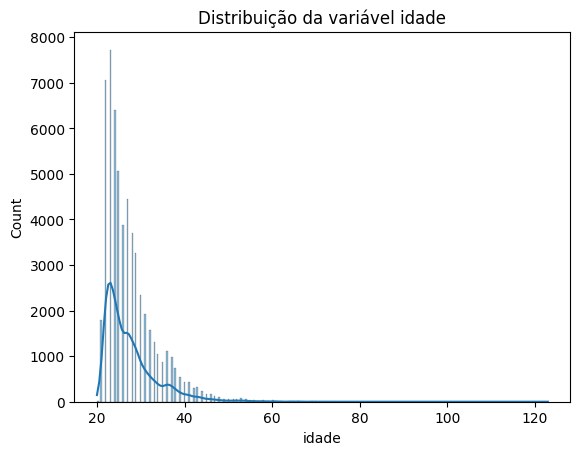

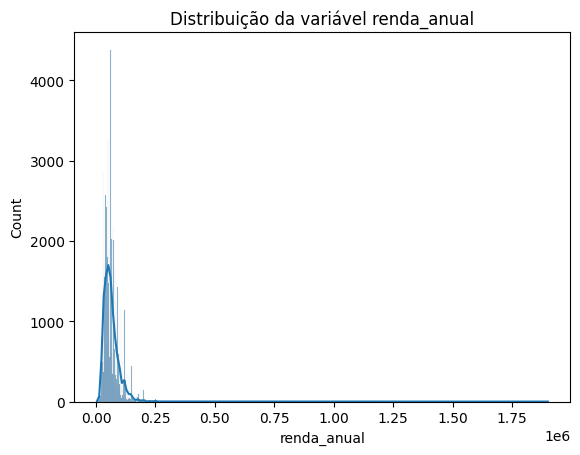

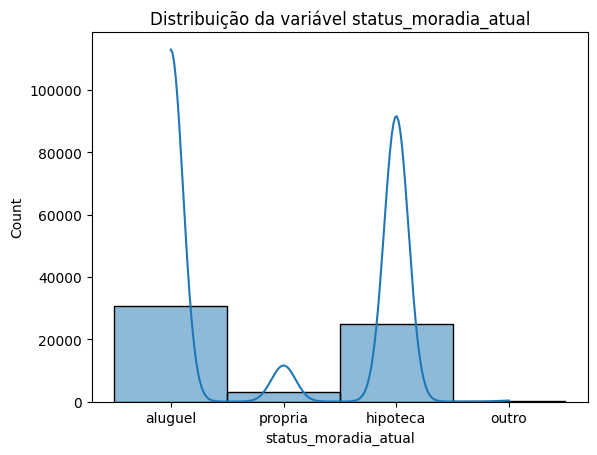

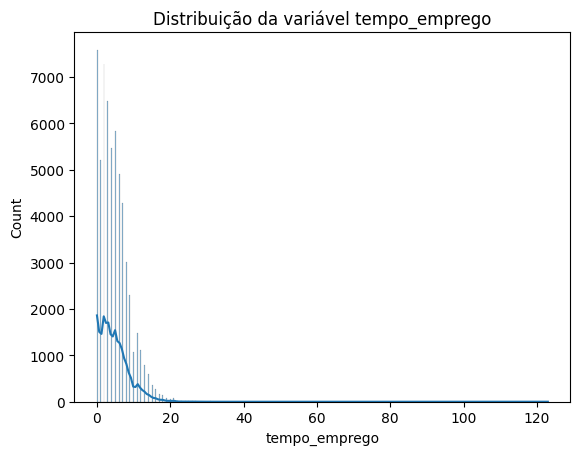

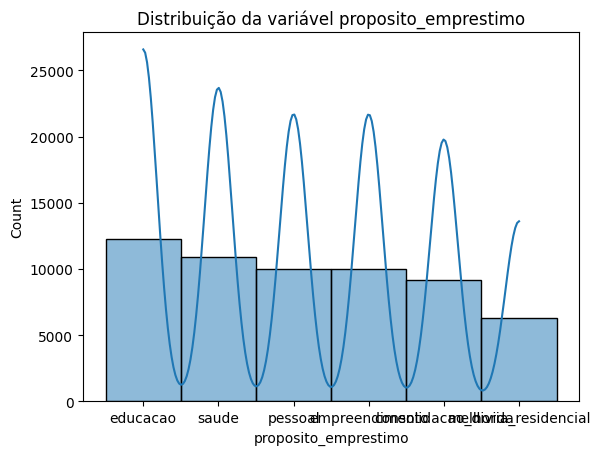

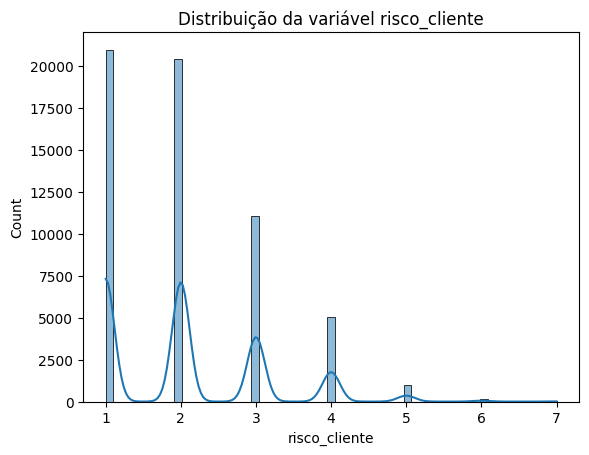

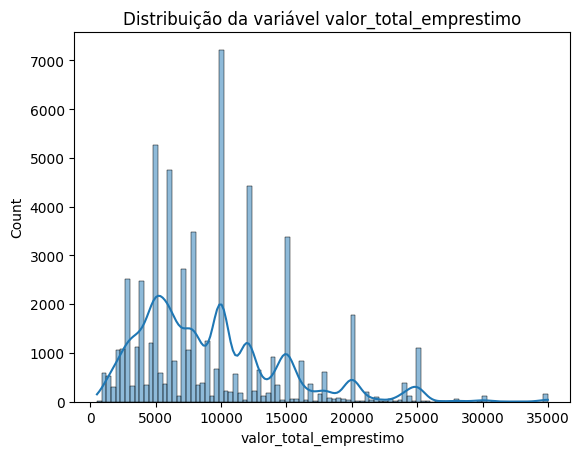

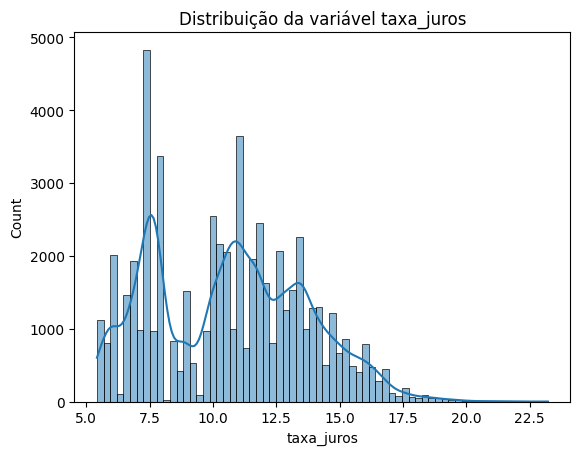

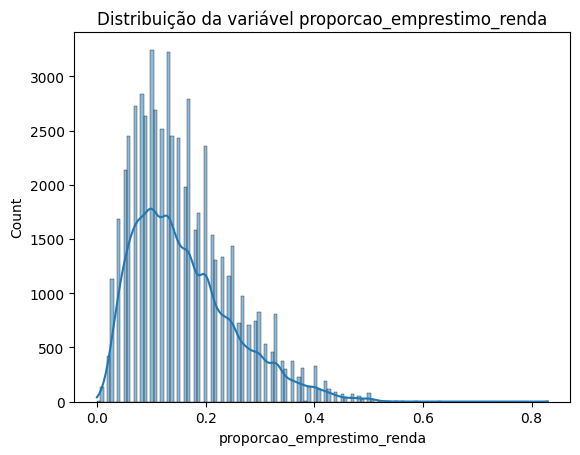

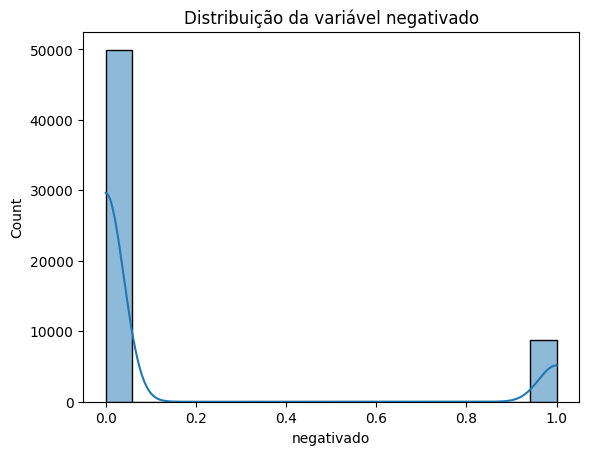

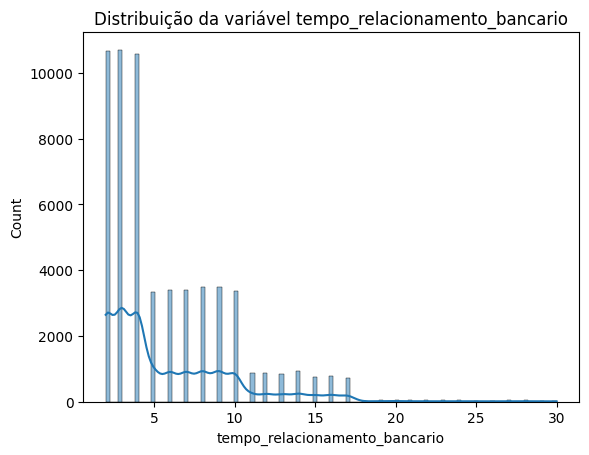

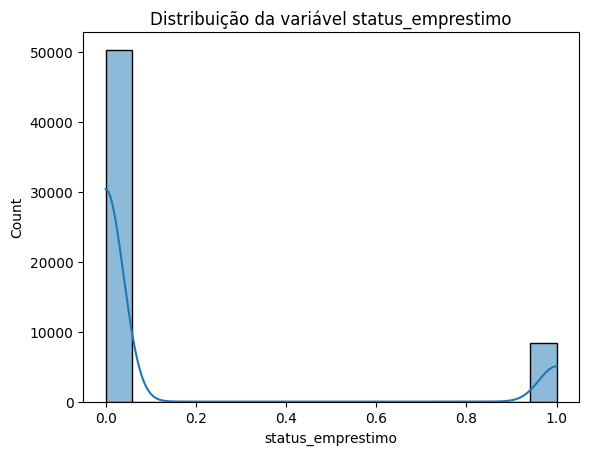

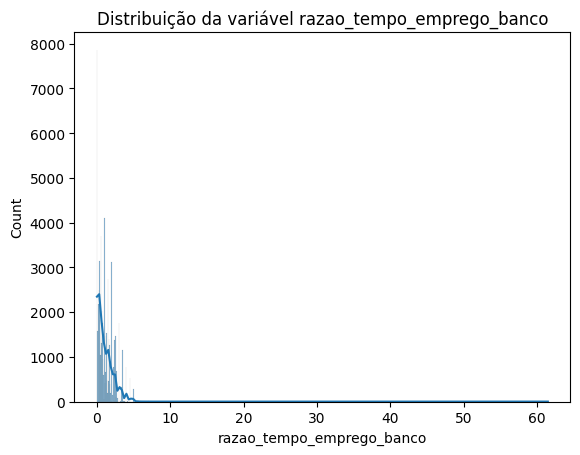

In [27]:
for col in df:
    
    sns.histplot(data=df, x=col, kde=True).set_title(f"Distribuição da variável {col}")
    plt.show()

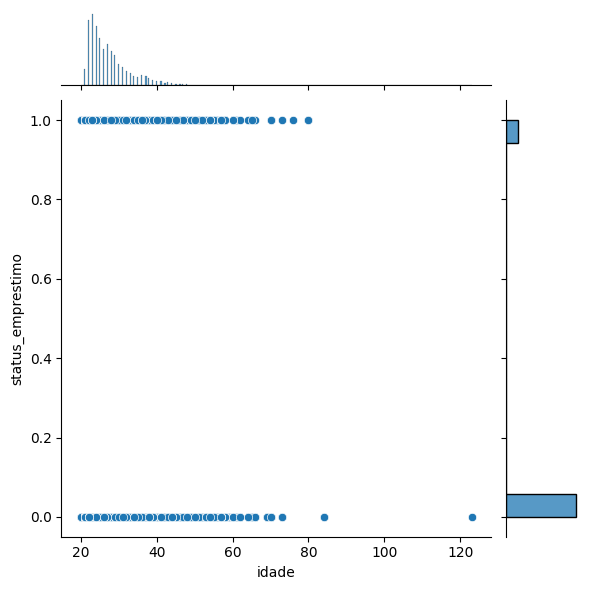

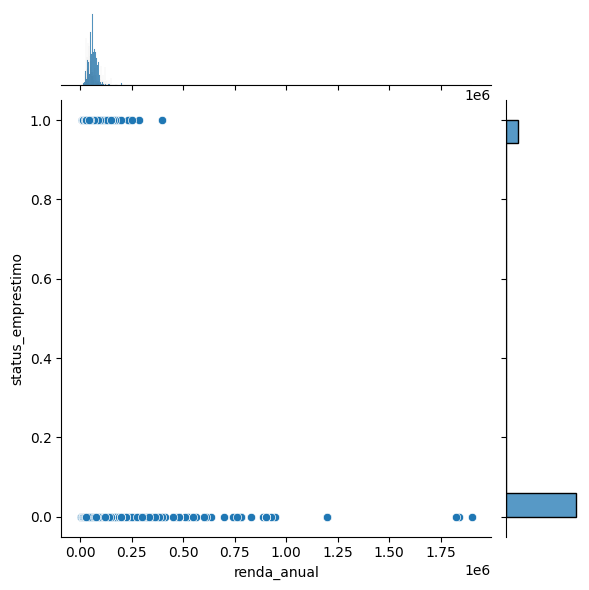

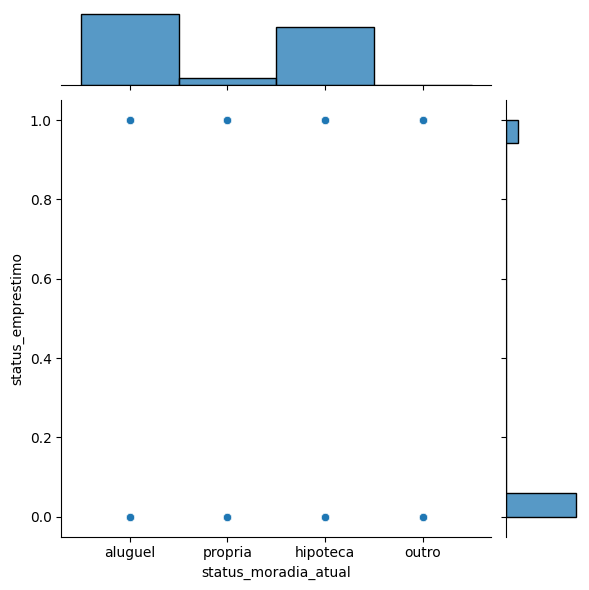

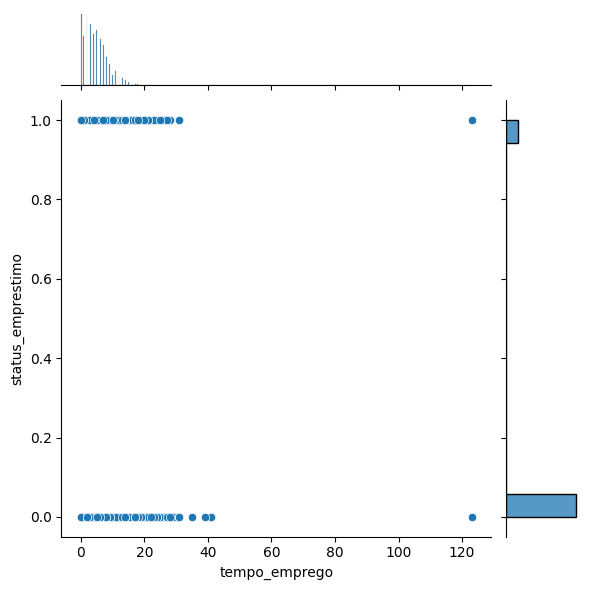

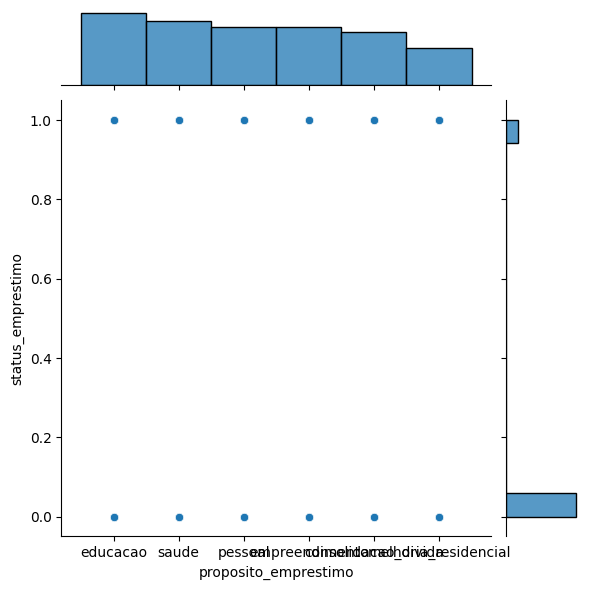

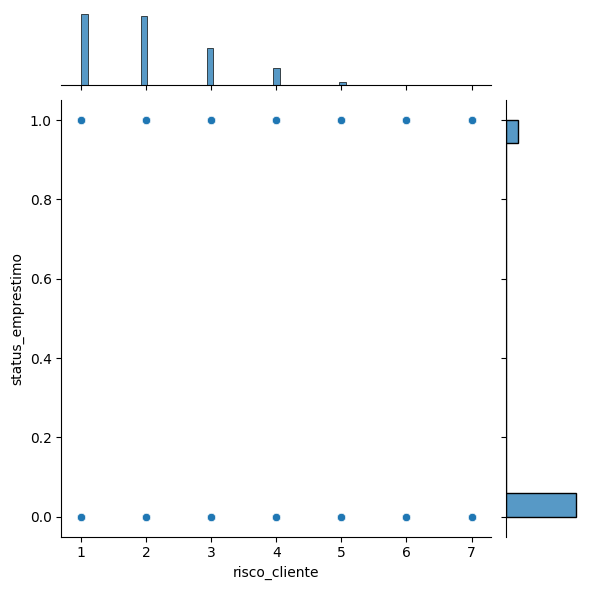

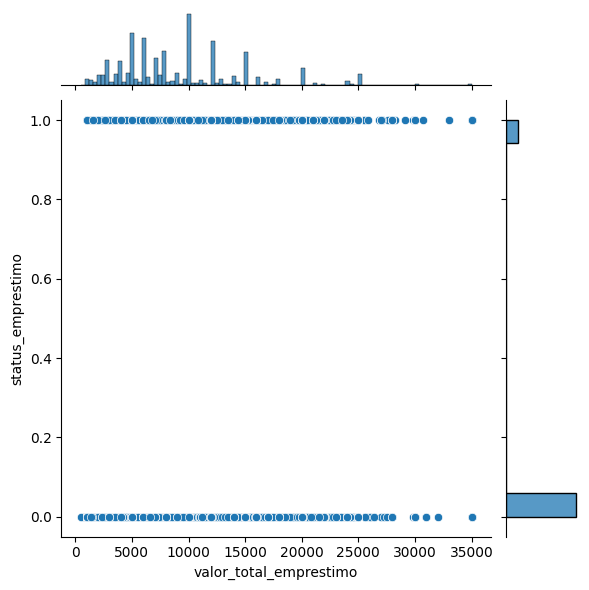

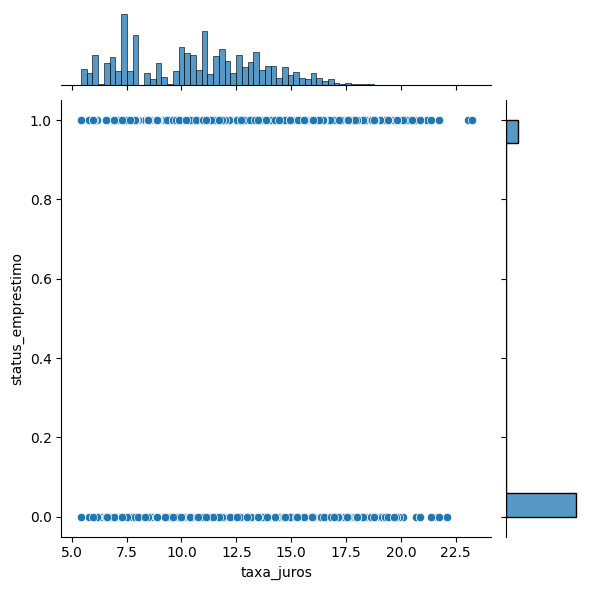

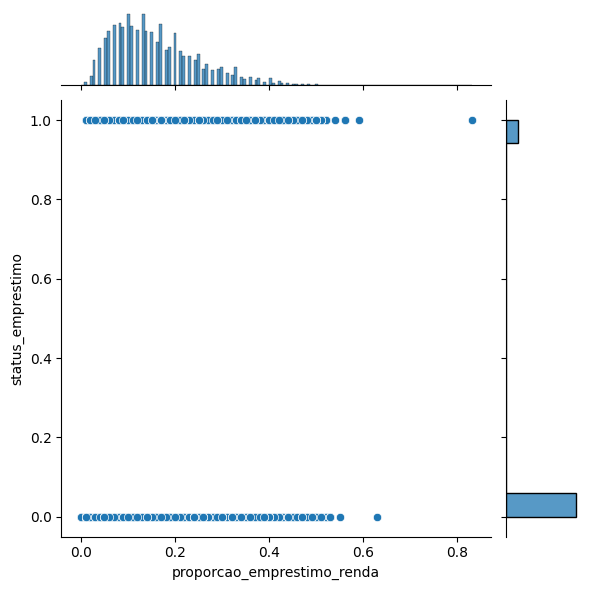

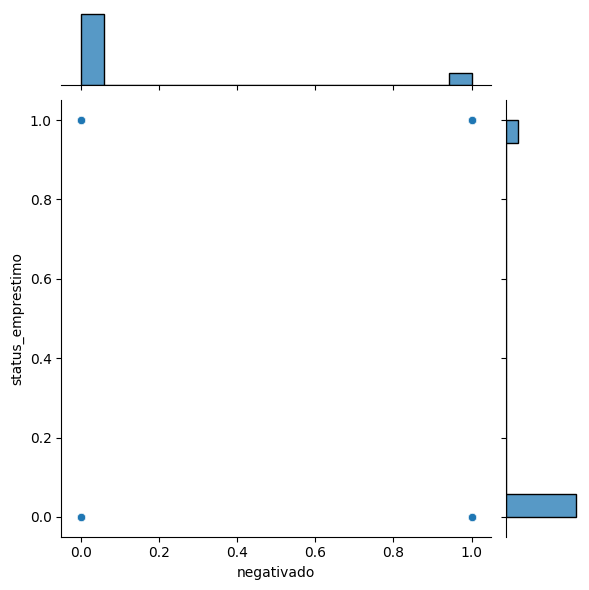

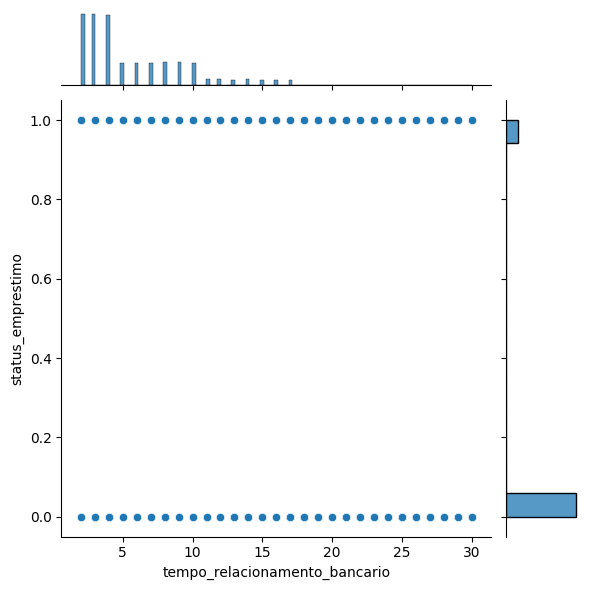

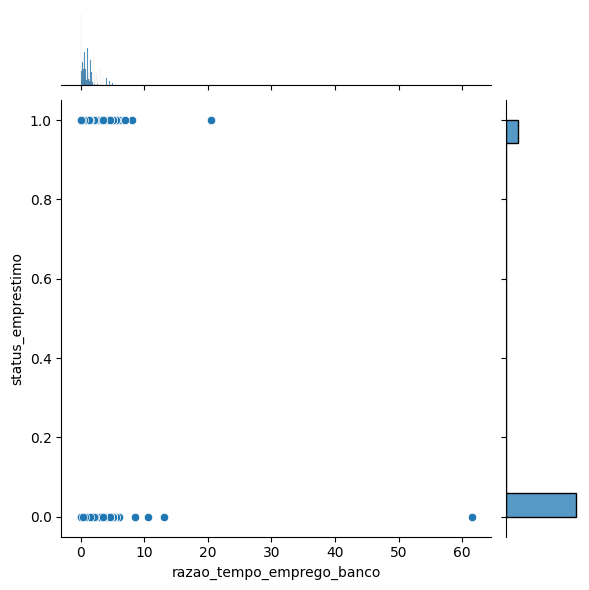

In [28]:
for col in df.drop(columns='status_emprestimo'):
    sns.jointplot(data=df, x=col, y='status_emprestimo')

In [29]:
df

,idade,renda_anual,status_moradia_atual,tempo_emprego,proposito_emprestimo,risco_cliente,valor_total_emprestimo,taxa_juros,proporcao_emprestimo_renda,negativado,tempo_relacionamento_bancario,status_emprestimo,razao_tempo_emprego_banco
0,37,35000,aluguel,0.0,educacao,2,6000,11.49,0.17,0,14,0,0.000
1,22,56000,propria,6.0,saude,3,4000,13.35,0.07,0,2,0,3.000
2,29,28800,propria,8.0,pessoal,1,6000,8.90,0.21,0,10,0,0.800
3,30,70000,aluguel,14.0,empreendimento,2,12000,11.11,0.17,0,5,0,2.800
4,22,60000,aluguel,2.0,saude,1,6000,6.92,0.10,0,3,0,0.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,hipoteca,5.0,educacao,4,25000,15.95,0.21,1,10,0,0.500
58641,28,28800,aluguel,0.0,saude,3,10000,12.73,0.35,0,8,1,0.000
58642,23,44000,aluguel,7.0,educacao,4,6800,16.00,0.15,0,2,1,3.500
58643,22,30000,aluguel,2.0,educacao,1,5000,8.90,0.17,0,3,0,0.667


In [30]:
## dropando o target e risco cliente, porque só quero analisar features e risco cliente não tem outlier

df_sem_target = df.drop(columns=["status_emprestimo", "risco_cliente"], axis= 1)
colunas_numericas = df_sem_target.select_dtypes(include=['float64', 'int64']).columns.tolist()

for col in colunas_numericas:
    
    if df[col].nunique() <= 2:
        print(f'A coluna {col} não tem outliers!')

    else:
        # Calcula Q1 e Q3 e IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        ## Definir os limites para outliers
        faixa_de_tolerancia = 1.5
        limite_inferior = Q1 - faixa_de_tolerancia * IQR
        limite_superior = Q3 + faixa_de_tolerancia * IQR
        
        ## Identificando os outliers

        outliers_inferiores = sorted(df[col][df[col] < limite_inferior].unique().tolist())
        outliers_superiores = sorted(df[col][df[col] > limite_superior].unique().tolist())

        aux_outliers = df[col].apply(lambda x : x < limite_inferior or x > limite_superior)
        
        indices_outliers = aux_outliers[aux_outliers].index.tolist()
        indices_unicos = []

        for indice in indices_outliers:
            indices_unicos.append(indice)
        
        if len(indices_outliers) >= 1:
            print(f'A coluna {col} tem {len(indices_outliers)} outliers!, ou seja {(len(indices_outliers)/len(df))*100:.2f}% dos dados da coluna são outliers')
            print(f"\nOs outliers do limite inferior são: {outliers_inferiores if outliers_inferiores else 'Nenhum'}")
            print(f"\nOs outliers do limite superior são: {outliers_superiores if outliers_superiores else 'Nenhum'}")
            
            # print("\n Os indíces deles são:\n")
            # print(indices_outliers)
        else:
            print(f'A coluna {col} não tem outliers!')
                
    print()
    print('='*80)

indices_unicos = set(indices_unicos)
print(f"A quantidade de outliers únicos é: {len(indices_unicos)}")


A coluna idade tem 2446 outliers!, ou seja 4.17% dos dados da coluna são outliers

Os outliers do limite inferior são: Nenhum

Os outliers do limite superior são: [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 69, 70, 73, 76, 80, 84, 123]

A coluna renda_anual tem 2411 outliers!, ou seja 4.11% dos dados da coluna são outliers

Os outliers do limite inferior são: Nenhum

Os outliers do limite superior são: [126132, 126251, 126996, 127000, 127500, 127992, 128000, 128004, 128400, 128474, 128500, 129996, 130000, 130104, 130500, 130992, 131000, 131004, 131040, 131400, 132000, 132150, 132444, 132500, 132650, 132652, 132750, 132850, 133000, 133119, 133300, 133900, 134000, 134300, 134500, 134748, 135000, 135456, 135660, 135996, 136000, 136092, 136112, 136173, 136625, 137004, 137057, 137720, 138000, 138600, 139008, 139380, 139913, 139992, 140000, 140004, 140300, 140787, 140900, 140987, 141000, 141996, 142000, 142500, 142800, 143000, 143004, 

In [31]:
# # Essa célula só deve rodar quando você quiser testar o EDA_modelagem. Para usar o teste 1 modelagem tem que comentar ela e rodar tudo de novo

# # Instancia o OneHotEncoder com nomeação de colunas customizada
# encoder = OneHotEncoder(sparse_output=False, drop=None)
# onehot_encoded = encoder.fit_transform(df[['proposito_emprestimo']])

# # Cria o DataFrame com colunas nomeadas
# onehot_df = pd.DataFrame(
#     onehot_encoded, 
#     columns=[f"proposito_emprestimo_{category}" for category in encoder.categories_[0]]
# )

# # Concatena o DataFrame original com as colunas de OneHotEncoding
# df = pd.concat([df, onehot_df], axis=1)

# df.drop(columns='proposito_emprestimo', axis=1, inplace=True)

# ## Fazer o mesmo para status moradia atual

# onehot_encoded = encoder.fit_transform(df[['status_moradia_atual']])

# # Cria o DataFrame com colunas nomeadas
# onehot_df = pd.DataFrame(
#     onehot_encoded, 
#     columns=[f"status_moradia_atual_{category}" for category in encoder.categories_[0]]
# )

# # Concatena o DataFrame original com as colunas de OneHotEncoding
# df = pd.concat([df, onehot_df], axis=1)

# df.drop(columns='status_moradia_atual', axis=1, inplace=True)


In [32]:
# Dropar as linhas com outliers.

df.drop(index=indices_unicos, inplace=True)

df

,idade,renda_anual,status_moradia_atual,tempo_emprego,proposito_emprestimo,risco_cliente,valor_total_emprestimo,taxa_juros,proporcao_emprestimo_renda,negativado,tempo_relacionamento_bancario,status_emprestimo,razao_tempo_emprego_banco
0,37,35000,aluguel,0.0,educacao,2,6000,11.49,0.17,0,14,0,0.000
1,22,56000,propria,6.0,saude,3,4000,13.35,0.07,0,2,0,3.000
2,29,28800,propria,8.0,pessoal,1,6000,8.90,0.21,0,10,0,0.800
3,30,70000,aluguel,14.0,empreendimento,2,12000,11.11,0.17,0,5,0,2.800
4,22,60000,aluguel,2.0,saude,1,6000,6.92,0.10,0,3,0,0.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,hipoteca,5.0,educacao,4,25000,15.95,0.21,1,10,0,0.500
58641,28,28800,aluguel,0.0,saude,3,10000,12.73,0.35,0,8,1,0.000
58642,23,44000,aluguel,7.0,educacao,4,6800,16.00,0.15,0,2,1,3.500
58643,22,30000,aluguel,2.0,educacao,1,5000,8.90,0.17,0,3,0,0.667


In [33]:
bins_idade = []

idade_minima = df['idade'].min()
idade_maxima = df['idade'].max()

for i in range(df['idade'].min(), (df['idade'].max()+3), 3):
    bins_idade.append(i)



In [34]:
# cria uma feaature alto risco para riscos maiores que 4, tentando solucinoar um problema da classificação ordinal
df['risco_alto_binario'] = df['risco_cliente'].apply(lambda x: 1 if x >=4 else 0)

# cria uma flag para comprometimento de renda alta 
df['taxa_comprometimento_alta'] = df['proporcao_emprestimo_renda'].apply(lambda x: 1 if x >= 0.3 else 0)

df['razao_tempo_banco_idade'] = df['tempo_relacionamento_bancario'] / df['idade'] # Não parece haver separação

In [35]:
df['taxa_juros'].min()

5.42

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


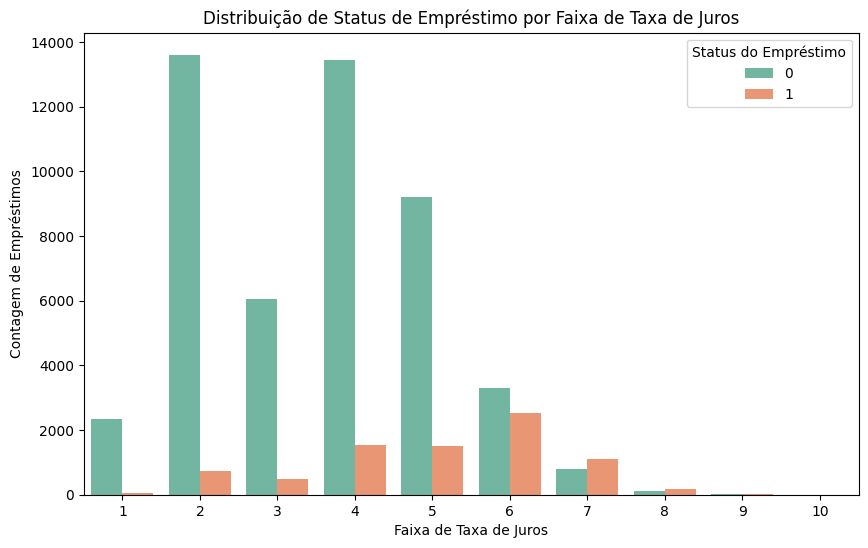

In [36]:
# Definir as faixas de taxa de juros
bins = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]  # Definindo as faixas
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Nomes das faixas
df['faixa_taxa_juros'] = pd.cut(df['taxa_juros'], bins=bins, labels=labels, right=False)

# Criar gráfico de barras
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='faixa_taxa_juros', hue='status_emprestimo', palette='Set2')

# Ajustes para visualização
plt.xlabel('Faixa de Taxa de Juros')
plt.ylabel('Contagem de Empréstimos')
plt.title('Distribuição de Status de Empréstimo por Faixa de Taxa de Juros')
plt.legend(title="Status do Empréstimo")
plt.show()

In [37]:
# Só rodar se for pra usar no teste1-modelagem. Se for pra EDA, comenta essa célula

labels = [f"faixa_etaria_{bins_idade[i]}_{bins_idade[i+1]}" for i in range(len(bins_idade)-1)]  # Nome das faixas

df['faixa_etaria'] = pd.cut(df['idade'], bins=bins_idade, labels=labels, right=False)

df['taxa_juros_alta'] = df['taxa_juros'].apply(lambda x: 1 if x >= 14 else 0)

In [38]:
df.to_csv("dados\\dados_tratados.csv", index=False)

In [39]:
df.isna().sum()

idade                            0
renda_anual                      0
status_moradia_atual             0
tempo_emprego                    0
proposito_emprestimo             0
risco_cliente                    0
valor_total_emprestimo           0
taxa_juros                       0
proporcao_emprestimo_renda       0
negativado                       0
tempo_relacionamento_bancario    0
status_emprestimo                0
razao_tempo_emprego_banco        0
risco_alto_binario               0
taxa_comprometimento_alta        0
razao_tempo_banco_idade          0
faixa_taxa_juros                 0
faixa_etaria                     0
taxa_juros_alta                  0
dtype: int64